In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from random import randrange

In [2]:
data = pd.read_csv('testData.csv', names=['X', 'Y', 'class'])
print(data.shape)
data.head()

(29, 3)


,X,Y,class
0,124,308,1
1,132,293,1
2,125,308,1
3,148,269,1
4,160,273,1


In [3]:
def get_initial_points(data, k):
    n = len(data)
    means = []
    while len(means) != k:
        row = data.iloc[randrange(n)].to_list()
        if row not in means:
            means.append(row)
    return means

In [4]:
def squared_euclidean_distance(a, b):
    n = len(a)
    assert(n == len(b))
    return sum([(a[i] - b[i])**2 for i in range(n)])

In [5]:
def k_means(data, k):
    # Obter pontos (centroides) iniciais:
    means = get_initial_points(data, k)
    change = True
    result = False
    new_result = False
    while change:
        new_result = {}
        for i in range(k):
            new_result[i] = []
        # Atribuir conjuntos de pontos aos clusters:
        for _, x in data.iterrows():
            point = x.to_list()
            smallest_dist = float("inf")
            cluster = None
            for i in range(k):
                sed = squared_euclidean_distance(point, means[i])
                if sed < smallest_dist:
                    smallest_dist = sed
                    cluster = i
            # Atribuir o ponto ao cluster mais próximo]:
            new_result[cluster].append(point)
        # 
        # Atualizar os centroides:
        new_means = []
        for i in range(k):
            new_means.append([float(sum(col))/len(col) for col in zip(*new_result[i])])
        # Critérios de parada
        if result:
            change = False
            for i in range(k):
                if sorted(result[i]) != sorted(new_result[i]):
                    change = True
        print(f"Change: {change}") #visualiza quantas iterações (true) faz, até converger false
        # Atualização das variáveis:
        result = new_result
        means = new_means
    return result

In [6]:
cols = ['X', 'Y']
res1 = k_means(data[cols], 2)


Change: True
Change: True
Change: True
Change: False


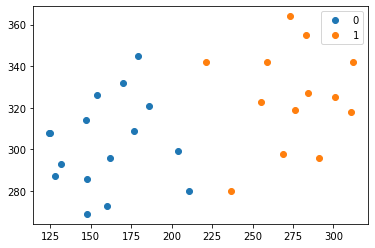

In [7]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for key, value in res1.items():
    x, y = zip(*value)
    ax.plot(x, y, marker='o', linestyle='', ms=6, label=str(key))
ax.legend()
plt.show()

In [8]:
def get_dissimilar_partitions(data, k):
    # Criar os conjuntos iniciais:
    initial_points = get_initial_points(data, k)
    result = {}
    for i in range(k):
        result[i] = [initial_points[i]]
    
    # Obter todos os outros pontos:
    all_points = []
    for _, x in data.iterrows():
        point = x.to_list()
        if point not in initial_points:
            all_points.append(point)
    
    # Atribuir os pontos:
    i = 0 # Quem começa é o primeiro conjunto
    while all_points:
        point_set = result[i]
        max_dist = 0
        point_to_add = None
        for x in all_points:
            min_dist_x = float("inf")
            for y in point_set:
                dist_x_y = squared_euclidean_distance(x, y)
                if dist_x_y < min_dist_x:
                    min_dist_x = dist_x_y
            if min_dist_x > max_dist:
                max_dist = min_dist_x
                point_to_add = x
        result[i].append(point_to_add)
        all_points.remove(point_to_add)
        i = (i + 1) % k
    
    return result

In [9]:
cols = ['X', 'Y']
res2 = get_dissimilar_partitions(data[cols], 2)

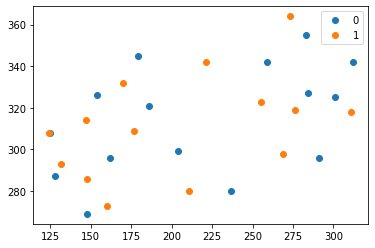

In [10]:
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for key, value in res2.items():
    x, y = zip(*value)
    ax.plot(x, y, marker='o', linestyle='', ms=6, label=str(key))
ax.legend()
plt.show()